In [1]:
import pickle
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from Utility import lorenz_curve,gini


In [2]:
## figure plotting configurations


plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

In [3]:
## parameters needed for plot

T = 40

In [4]:
## get the wealth distribution from SCF (net worth)

SCF2016 = pd.read_stata('rscfp2016.dta')
SCF2016 = SCF2016.drop_duplicates(subset=['yy1'])

SCF_wealth, SCF_weights = np.array(SCF2016['networth']), np.array(SCF2016['wgt'])

## get the lorenz curve weights from SCF 
SCF_wealth_sort_id = SCF_wealth.argsort()
SCF_wealth_sort = SCF_wealth[SCF_wealth_sort_id]
SCF_weights_sort = SCF_weights[SCF_wealth_sort_id]
SCF_weights_sort_norm = SCF_weights_sort/SCF_weights_sort.sum()

SCF_share_agents_ap, SCF_share_ap = lorenz_curve(SCF_wealth_sort,
                                                 SCF_weights_sort_norm,
                                                 nb_share_grid = 200)


SCF_profile = pd.read_pickle('data/SCF_age_profile.pkl')

SCF_profile['mv_wealth'] = SCF_profile['av_wealth'].rolling(3).mean()

## gini 

gini_SCF = gini(SCF_share_agents_ap,
                 SCF_share_ap)

In [7]:
model_names=['baseline',
             'SLPR',
             'LPR',
             #'hetero_type',
             #'SHPR',
             #'HPR'
             ]

0.0017989268790874432
0.0015771587796373876
0.0015823899051601537


KeyError: 'h2m_share_pe'

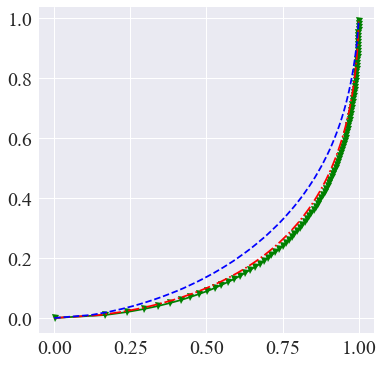

In [9]:
## plot results from different models

line_patterns =['g-v',
                'r-.',
                'b--',
                'y.',
                'k-*'
                ]

## Lorenz curve of steady state wealth distribution

fig, ax = plt.subplots(figsize=(6,6))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini']))
ax.plot(SCF_share_agents_ap,
        SCF_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('../Graphs/model/lorenz_a_compare_pe.png')


## life cycle

age_lc = SCF_profile.index

fig, ax = plt.subplots(figsize=(16,8))
plt.title('Life cycle profile of wealth')

for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    ax.plot(age_lc[1:],
           np.log(model_solution['A_life']),
           line_patterns[k],
           label= model_name)
ax.set_ylim([-0.5,3.5])

ax2 = ax.twinx()
ax2.set_ylim([10.5,15])
ax2.vlines(T+25,
          10.5,
          15,
          color='k',
          label='retirement'
         )
ax2.bar(age_lc[1:],
        np.log(SCF_profile['mv_wealth'][1:]),
       label='SCF (RHS)')

ax.set_xlabel('Age')
ax.set_ylabel('Log wealth in model')
ax2.set_ylabel('Log wealth SCF')
ax.legend(loc=1)
ax2.legend(loc=2)
fig.savefig('../Graphs/model/life_cycle_a_compare_pe.png')



## wealth distributions in pe

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label=model_name+', H2M={:.2f}'.format(model_solution['h2m_share']),
           alpha = 0.8)
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_xlim([-10,30])


ax.set_ylabel(r'$prob(a)$')

fig.savefig('../Graphs/model/distribution_a_compare_pe.png')


## lorenz curve in ge

fig, ax = plt.subplots(figsize=(6,6))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini_ge']))

ax.plot(SCF_share_agents_ap,
        SCF_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.legend()
plt.xlim([0,1])
plt.ylim([0,1])
fig.savefig('../Graphs/model/lorenz_a_compare_ge.png')


## life cycle profile in ge

fig, ax = plt.subplots(figsize=(16,8))
plt.title('Life cycle profile of wealth')

for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ax.plot(age_lc[:-2],
            np.log(model_solution['A_life'])[:-1],
            line_patterns[k],
           label = model_name)

ax.set_ylim([-0.5,3.5])

ax2 = ax.twinx()
ax2.set_ylim([10.5,15])
ax2.vlines(T+25,
          10.5,
          15,
          color='k',
          label='retirement')
ax2.bar(age_lc,
        np.log(SCF_profile['mv_wealth']),
       #'k--',
       label='SCF (RHS)')

ax.set_xlabel('Age')
ax.set_ylabel('Log wealth')
ax2.set_ylabel('Log wealth SCF')
ax.legend(loc=1)
ax2.legend(loc=2)
fig.savefig('../Graphs/model/life_cycle_a_compare.png')


## wealth distributions in ge

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label=model_name+', H2M={:.2f}'.format(model_solution['h2m_share']),
            alpha = 0.8)
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_ylabel(r'$prob(a)$')
ax.set_xlim([-10,30])


fig.savefig('../Graphs/model/distribution_a_compare_ge.png')

